# Fundamental_7
<b>작성일자 : </b>2021-05-30<br>
<b>작성자 : </b>이예희<br>
<b>작성내용 : </b><br>
<ul>
    <li>HW_Fundamental_7</li>
    <li>파이썬으로 이미지 파일 다루기</li>
</ul>
<hr>

## Pillow 사용법

In [2]:
# install
# !pip install pillow opencv-python matplotlib

In [64]:
# import

import numpy as np
from PIL import Image
import os

In [50]:
data = np.zeros([32, 32, 3], dtype = np.uint8) 
print(data.shape)  # (32, 32, 3)
# 32x32 픽셀. 3 채널
# 채널값은 모두 0. np.zeros. 검정색임.
# unit8 : unsigned int 8. 부호없는 8비트 정수
image = Image.fromarray(data, "RGB")
# 만들어진 배열을 RGB 이미지 객체로 변환
image.show()
# 화면에 보여줌

(32, 32, 3)


In [51]:
# 검은 네모를 빨간 네모로 변경
data[:, :] = [255, 0, 0]
image = Image.fromarray(data, 'RGB')
image.show()

### 연습문제
1. 가로 세로 각 128픽셀짜리 흰 이미지를 만들어 화면에 표시

In [52]:
data = np.zeros([128, 128, 3], dtype = np.uint8)
data[:, :] = [255, 255, 255]
image = Image.fromarray(data, "RGB")
image.show()

2. 연습용 이미지를 열어 width와 height를 출력하고, .save()를 이용하여 jpg 파일 포맷으로 저장

In [53]:
image_path = "./aiffel/python_image_proc/pillow_practice.png"

# 이미지 열기
# image = Image.open(image_path)
# image.show()

# width, height 출력
print(image.width)
print(image.height)
print()

# JPG 파일 형식으로 저장
new_image_path = "./aiffel/python_image_proc/pillow_practice.jpg"
image = image.convert("RGB")
image.save(new_image_path)

128
128



3. .resize()를 이용하여 이미지 크기를 100X200으로 변경하여 저장

In [54]:
resized_image = image.resize([100, 200])
# image.resize((100, 200))과 동일
# resized_image.show()

resized_image_path = "./aiffel/python_image_proc/resized_pillow_practice.jpg"
resized_image.save(resized_image_path)

4. .crop()을 이용하여 눈 부분만 잘라내어 저장<br>
눈 부분의 box 좌표는 (300, 100, 600, 400)

In [55]:
crop_image = image.crop((300, 100, 600, 400))
# crop_image.show()

crop_image_path = "./aiffel/python_image_proc/crop_pillow_practice.png"
crop_image.save(crop_image_path)

## Pillow를 활용한 데이터 전처리

In [11]:
# import

import numpy as np
from PIL import Image
import os
import pickle
from tqdm import tqdm    # 진행상황 시각화해서 체크해볼 수 있음

In [56]:
dir_path = "./aiffel/python_image_proc/cifar-100-python"
train_file_path = os.path.join(dir_path, "train")
# print(train_file_path)
# ./aiffel/python_image_proc/cifar-100-python\train
# dir_path의 하위 디렉터리 train을 지정하는듯

# -----------------------------------------------------------------
# 파일 불러오기

with open(train_file_path, "rb") as f:
    # rb : read binary
    # train_file_path 경로에 있는 파일을 f라는 이름으로 불러온단뜻인듯
    train = pickle.load(f, encoding = "bytes")
    # 파일 불러옴. encoding이 bytes.
    
print(type(train))
# 여러개 불러와서 딕셔너리인가?

# print(train)
# 뭔지 모르겠지만 b가 붙어있는걸로 봐서는 바이너리 타입인거같은데
# 뭔가 엄청 많음


<class 'dict'>


In [57]:
# train 데이터 일부 확인

print(train.keys())
# 문자열이 아닌 b로 시작하는 bytes로 되어있음
print()

print(train[b'filenames'][0:5])
print()
print(train[b'data'][0].shape)
# (3072,) : 3채널 * 1024( = 32 * 32)
# 이 넘파이 배열을 reshape하면 이미지 파일 원본이 복구된단거임
# 그렇다고 아무렇게나 reshape하면 이미지가 제대로 복구되지 않음


dict_keys([b'filenames', b'batch_label', b'fine_labels', b'coarse_labels', b'data'])

[b'bos_taurus_s_000507.png', b'stegosaurus_s_000125.png', b'mcintosh_s_000643.png', b'altar_boy_s_001435.png', b'cichlid_s_000031.png']

(3072,)


In [58]:
# reshape

image_data = train[b'data'][0].reshape([32, 32, 3], order = "F")
# 정렬을 F를 기준으로 한다는것인듯?
image = Image.fromarray(image_data)
image.show()
# ? 뭔가. 소 같은 이미지가 나왔음.


# order 제거
# image_data = train[b'data'][0].reshape([32, 32, 3])
# # order 없애니까 완전 이상하게 나옴. 구역이 9개로 나눠진 상태로 이상하게 나옴
# image = Image.fromarray(image_data)
# image.show()

In [59]:
# X, Y 축 뒤집어진 이미지를 원래대로 뒤집기

image_data = image_data.swapaxes(0, 1)
# axis 를 스왑하는듯. 행과 열을 바꿔버리는건가

image = Image.fromarray(image_data)
image.show()

스스로 완성해보기

In [65]:
dir_path = './aiffel/python_image_proc/cifar-100-python'
train_file_path = os.path.join(dir_path, 'train')

# image를 저장할 cifar-100-python의 하위 디렉토리(images)를 생성합니다.
images_dir_path = os.path.join(dir_path, 'images')
if not os.path.exists(images_dir_path):
    os.mkdir(images_dir_path) # images 디렉토리 생성

# 32X32의 이미지 파일 50000개를 생성합니다.
with open(train_file_path, 'rb') as f:
    train = pickle.load(f, encoding='bytes')
    for i in tqdm(range(len(train[b'filenames']))):
        filename = train[b'filenames'][i].decode()
        data = train[b'data'][i].reshape([32, 32, 3], order='F')
        image = Image.fromarray(data.swapaxes(0, 1))
        image.save(os.path.join(images_dir_path, filename))

100%|██████████████████████████████████████████████████████████████████████████| 50000/50000 [00:47<00:00, 1059.86it/s]


## OpenCV 1
OpenCV : 오픈소스로 제공되는 컴퓨터 비전용 라이브러리<br>
OpenCV에서는 RGB가 아니라 BGR을 사용함

In [2]:
# import

import cv2 as cv
import numpy as np

In [66]:
cap = cv.VideoCapture(0)

while(1):
    # Take each frame
    _, frame = cap.read()
    
    # Convert BGR to HSV
    hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
    
    # define range of blue color in HSV
    lower_blue = np.array([110,50,50])
    upper_blue = np.array([130,255,255])
    
    # Threshold the HSV image to get only blue colors
    mask = cv.inRange(hsv, lower_blue, upper_blue)
    
    # Bitwise-AND mask and original image
    res = cv.bitwise_and(frame,frame, mask= mask)
    cv.imshow('frame',frame)
    cv.imshow('mask',mask)
    cv.imshow('res',res)
    k = cv.waitKey(5) & 0xFF
    if k == 27:
        break
        
cv.destroyAllWindows()
cap.release()

# frame, mask, res 세개 창 뜸
# frame은 그냥 카메라 켜진 느낌
# mask는 검정과 흰색밖에 안보이는 느낌. 파란색이 들어간 영역을 흰색으로 표현하는듯
# res는 파란색 영역이 파란색으로 보이는느낌

위 코드 분해

In [16]:
cap = cv.VideoCapture(0)
# 영상 캡쳐를 위해 카메라를 여는 함수
# 0을 넣으면 카메라가 열리고, 1을 넣으면 카메라 꺼짐
# c++과 마찬가지로 image라는 입력값을 받을 수 있지만, 선택임.
# 함수 반환값이 return value(retval)과 image임.

print(cap)

<VideoCapture 0000014275152530>


In [12]:
while(1):
    # Take each frame
    _, frame = cap.read()
    
# 반복해서 카메라를 엶.
# _에 안쓰고 버릴 값을 받음. 관습상의 변수
# _ 에 retval을 넣고, image를 frame에 넣은것

KeyboardInterrupt: 

In [20]:
# Convert BGR to HSV
hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
# 컬러 스페이스 변환을 위한 함수
# print(hsv)

# print(hsv.shape) 
# 480*640 3 채널
# 반환되는 값이 배열임

In [24]:
# define range of blue color in HSV
lower_blue = np.array([110,50,50])
upper_blue = np.array([130,255,255])
# 숫자로 파란색 부분 정의
# hsv색 공간에서 색상(hue)값 110~130,
# 채도와 명도는 각각 50~255 사이 색들을 파란색이라고 정의함
# lower_blue와 upper_blue 사이값이 파란색
# 각각 색상, 채도, 명도

# Threshold the HSV image to get only blue colors
mask = cv.inRange(hsv, lower_blue, upper_blue)
# print(mask)
# print(mask.shape)
# 480*640 채널 없음. 2차원배열임

# 마스크를 씌워서 선택한 부분만 오려낼 수 있도록 한 것

In [28]:
# Bitwise-AND mask and original image
res = cv.bitwise_and(frame,frame, mask= mask)
# print(res)
# print(res.shape)
# 480*640 3채널

# 이미지 두 장을 받아서 비트 and 연산
# mask를 넣었을 때, 해당 영역만 따오도록 한것임
# 마스크는 0 혹은 1 값만 들어있으니까
# 흰색(1) 부분만 따올 수 있도록 한 것

In [30]:
# 각각을 화면에 출력
cv.imshow('frame',frame)
cv.imshow('mask',mask)
cv.imshow('res',res)

# 루프 탈출
k = cv.waitKey(5) & 0xFF
if k == 27:
    # esc(27) 키를 입력하면 루프를 빠져나옴
    # 지금은 루프 없어서 사용 불가
    break

# 열려있던 창을 모두 닫음
cv.destroyAllWindows()

SyntaxError: 'break' outside loop (<ipython-input-30-a44222530872>, line 11)

### 연습문제
Q1. & 0xFF는 어떤 역할을 하는 코드?

A. Numlock을 제거. 자세한 설명은 링크 참조
https://stackoverflow.com/questions/35372700/whats-0xff-for-in-cv2-waitkey1/39201163#39201163

## 비슷한 이미지 찾아내기 
OpenCV에서 제공하는 기능 중 이미지에서 색상 히스토그램 추출하고, 서로 비교하는 기능을 불러서 사용할것임. OpenCV는 C++로 구현되어있고, 파이썬에서 불러서 사용할 수 있도록 opencv-python을 설치해야함

In [67]:
import os
import pickle
import cv2
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
from PIL import Image

# 전처리 시 생성했던 디렉토리 구조 
dir_path = './aiffel/python_image_proc/cifar-100-python'
# 경로 앞에 붙어있던 os.getenv('HOME')+ 부분은 나한테 불필요하므로 제거함
train_file_path = os.path.join(dir_path, 'train')
images_dir_path = os.path.join(dir_path, 'images')

In [68]:
# 파일명을 인자로 받아 해당 이미지 파일과 히스토그램을 출력해 주는 함수
def draw_color_histogram_from_image(file_name):
    image_path = os.path.join(images_dir_path, file_name)
    # 이미지 열기
    img = Image.open(image_path)
    cv_image = cv2.imread(image_path)
    
    # Image와 Histogram 그려보기
    f=plt.figure(figsize=(10,3))
    im1 = f.add_subplot(1,2,1)
    im1.imshow(img)
    im1.set_title("Image")
    
    im2 = f.add_subplot(1,2,2)
    color = ('b','g','r')
    for i,col in enumerate(color):
        # image에서 i번째 채널의 히스토그램을 뽑아서(0:blue, 1:green, 2:red)
        histr = cv2.calcHist([cv_image],[i],None,[256],[0,256])
        im2.plot(histr,color = col) # 그래프를 그릴 때 채널 색상과 맞춰서 그립니다.
    im2.set_title("Histogram")

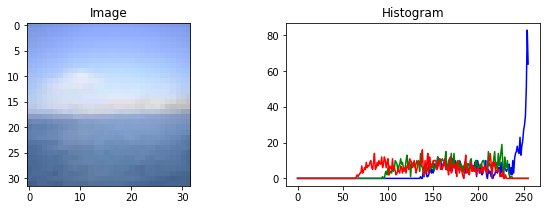

In [69]:
draw_color_histogram_from_image('adriatic_s_001807.png')
# 섹상 그래프 나타나는듯. 근데 왜 히스토그램이 아니지?

In [78]:
def get_histogram(image):
    histogram = []
    
    # Create histograms per channels, in 4 bins each.
    for i in range(3):
        channel_histogram = cv2.calcHist(images=[image],
                                         channels=[i],
                                         mask=None,
                                         histSize=[4], # 히스토그램 구간을 4개로 한다.
                                         ranges=[0, 256])

        histogram.append(channel_histogram)

    histogram = np.concatenate(histogram)
    histogram = cv2.normalize(histogram, histogram)
    
    return histogram

In [79]:
# get_histogram() 확인용 코드
filename = train[b'filenames'][0].decode()
file_path = os.path.join(images_dir_path, filename)
image = cv2.imread(file_path)
histogram = get_histogram(image)
histogram

array([[0.3126804 ],
       [0.4080744 ],
       [0.14521089],
       [0.21940625],
       [0.18654831],
       [0.23742512],
       [0.30208108],
       [0.35931748],
       [0.06465594],
       [0.35825753],
       [0.36991683],
       [0.29254165]], dtype=float32)

In [83]:
def build_histogram_db():
    histogram_db = {}
    
    #디렉토리에 모아 둔 이미지 파일들을 전부 리스트업합니다.
    path = images_dir_path
    file_list = os.listdir(images_dir_path)
    
    for file_name in tqdm(file_list):
        file_path = os.path.join(images_dir_path, file_name)
        image = cv2.imread(file_path)
        histogram = get_histogram(image)
        
        histogram_db[file_name] = histogram

    return histogram_db

In [84]:
histogram_db = build_histogram_db()
histogram_db['adriatic_s_001807.png']

100%|███████████████████████████████████████████████████████████████████████████| 49999/49999 [05:12<00:00, 160.02it/s]


array([[0.        ],
       [0.        ],
       [0.29744893],
       [0.5828624 ],
       [0.        ],
       [0.17107612],
       [0.41608465],
       [0.29315054],
       [0.        ],
       [0.34301192],
       [0.37224102],
       [0.16505837]], dtype=float32)

In [85]:
def get_target_histogram():
    filename = input("이미지 파일명을 입력하세요: ")
    if filename not in histogram_db:
        print('유효하지 않은 이미지 파일명입니다.')
        return None
    return histogram_db[filename]

In [86]:
target_histogram = get_target_histogram()
target_histogram

이미지 파일명을 입력하세요: adriatic_s_001807.png


array([[0.        ],
       [0.        ],
       [0.29744893],
       [0.5828624 ],
       [0.        ],
       [0.17107612],
       [0.41608465],
       [0.29315054],
       [0.        ],
       [0.34301192],
       [0.37224102],
       [0.16505837]], dtype=float32)

In [87]:
def search(histogram_db, target_histogram, top_k=5):
    results = {}
    
    # Calculate similarity distance by comparing histograms.
    for file_name, histogram in tqdm(histogram_db.items()):
        distance = cv2.compareHist(H1=target_histogram,
                                   H2=histogram,
                                   method=cv2.HISTCMP_CHISQR)
        
        results[file_name] = distance
        
        results = dict(sorted(results.items(), key=lambda item: item[1])[:top_k])
    
    return results

In [88]:
result = search(histogram_db, target_histogram)
result

100%|████████████████████████████████████████████████████████████████████████| 49999/49999 [00:00<00:00, 309632.97it/s]


{'adriatic_s_001807.png': 0.0,
 'baby_s_001654.png': 0.047506706444185816,
 'fogbank_s_000423.png': 0.059270738493642845,
 'tank_s_000442.png': 0.060966690827361725,
 'dessert_plate_s_000124.png': 0.06113711905561663}

In [89]:
def show_result(result):
    f=plt.figure(figsize=(10,3))
    
    for idx, filename in enumerate(result.keys()):
        img_path = os.path.join(images_dir_path, filename)
        im = f.add_subplot(1,len(result),idx+1)
        img = Image.open(img_path)
        im.imshow(img)

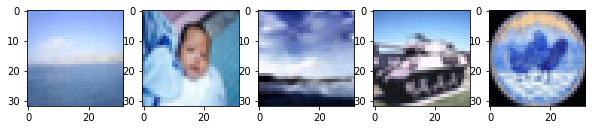

In [90]:
show_result(result)

이미지 파일명을 입력하세요: adriatic_s_001807.png


100%|████████████████████████████████████████████████████████████████████████| 49999/49999 [00:00<00:00, 302355.43it/s]


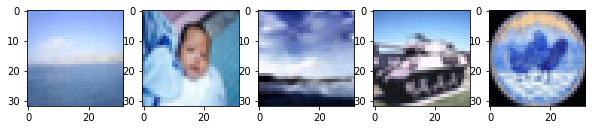

In [91]:
target_histogram = get_target_histogram()
result = search(histogram_db, target_histogram)
show_result(result)